# TITLE: Movie Recommendation system
## Collaborators
1. Ezra Kipchirchir
2. Sharon Kaliku
3. Mercy Tegekson
4. Robinson Mumo
5. Allen Maina
6. Candy Gudda

### Project Overview



### Introduction



### Challenges




### Proposed solutions



### Problem statement



### Data understanding
`movieId`: Identifier for a movie.
#
`title`: The title of the movie.
#
`genres`: The genres associated with the movie.
#
`userId_x`: User identifier from the first DataFrame.
#
`rating`: Rating given by a user for a particular movie.
#
`timestamp_x`: Timestamp of the rating from the first DataFrame.
#
`userId_y`: User identifier from the second DataFrame.
#
`tag`: Tag associated with a movie from the second DataFrame.
#
`timestamp_y`: Timestamp of the tag from the second DataFrame.
#
`imdbId`: IMDb ID is a unique identifier assigned to each title (movie, TV show, etc.) on IMDb
#
`tmdbId`: TMDb ID is a unique identifier assigned to each title (movie or TV show) on TMDb.
#### 1. Importing the required libraries and modules for our project

In [62]:
# importing modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from functions import sns_ycount, sns_xcount
from functools import reduce
from datetime import datetime



#### 1.2 loading and doing the necessary inspection on our data

In [63]:
links = pd.read_csv("data/links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [64]:
movies = pd.read_csv("data/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [65]:
ratings = pd.read_csv("data/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [66]:
tags = pd.read_csv("data/tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### 1.2 Merging our four datasets into one dataframe 

In [67]:
# List of DataFrames to merge
dataframes = [movies, ratings, tags, links]

# Use reduce() and pd.merge() to merge the DataFrames
merged_data = reduce(lambda left, right: pd.merge(left, right, on= "movieId"), dataframes)
#inspecting the first five rows
merged_data.head()


,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825,114709,862.0


In [68]:
merged_data["timestamp_x"].dtype

dtype('int64')

Changing rating timestamp and tag timestamp to human readable format for easy analysis

In [69]:
#using utcfromtimestamp method from datetime module to convert timestamps to human readable format
merged_data["rating_timestamp"] = merged_data["timestamp_x"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
merged_data["tag_timestamp"] = merged_data["timestamp_y"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
#changing the timestamps to pandas datetime objects
merged_data["rating_timestamp"] = pd.to_datetime(merged_data["rating_timestamp"])
merged_data["tag_timestamp"] = pd.to_datetime(merged_data["tag_timestamp"])
merged_data.drop(columns=["timestamp_x", "timestamp_y"], axis= 1, inplace= True)
merged_data.head()


,movieId,title,genres,userId_x,rating,userId_y,tag,imdbId,tmdbId,rating_timestamp,tag_timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,336,pixar,114709,862.0,2000-07-30 18:45:03,2006-02-04 09:36:04
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,474,pixar,114709,862.0,2000-07-30 18:45:03,2006-01-14 02:47:05
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,567,fun,114709,862.0,2000-07-30 18:45:03,2018-05-02 18:33:33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,336,pixar,114709,862.0,1996-11-08 06:36:02,2006-02-04 09:36:04
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,474,pixar,114709,862.0,1996-11-08 06:36:02,2006-01-14 02:47:05


In [70]:
#info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           233213 non-null  int64         
 1   title             233213 non-null  object        
 2   genres            233213 non-null  object        
 3   userId_x          233213 non-null  int64         
 4   rating            233213 non-null  float64       
 5   userId_y          233213 non-null  int64         
 6   tag               233213 non-null  object        
 7   imdbId            233213 non-null  int64         
 8   tmdbId            233213 non-null  float64       
 9   rating_timestamp  233213 non-null  datetime64[ns]
 10  tag_timestamp     233213 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 19.6+ MB


Our data seems to have no null values nor missing data
#
We will go ahed and do summary statistics for our numerical columns

In [71]:
#summary statistics
merged_data.describe()

,movieId,userId_x,rating,userId_y,imdbId,tmdbId,rating_timestamp,tag_timestamp
count,233213.000000,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,233213,233213
mean,12319.999443,309.688191,3.966535,470.683564,2.610632e+05,9378.277742,2008-06-15 10:00:05.688053504,2013-11-18 11:23:32.147153152
min,1.000000,1.000000,0.500000,2.000000,1.234900e+04,11.000000,1996-03-29 18:36:55,2006-01-13 19:09:12
25%,296.000000,156.000000,3.500000,424.000000,1.103570e+05,278.000000,2002-03-29 01:16:06,2009-05-16 17:18:24
50%,1198.000000,309.000000,4.000000,477.000000,1.109120e+05,680.000000,2008-07-29 09:45:57,2016-03-13 20:34:05
75%,4638.000000,460.000000,5.000000,599.000000,1.724950e+05,1892.000000,2015-09-25 17:11:10,2017-06-26 05:56:57
max,193565.000000,610.000000,5.000000,610.000000,5.580390e+06,503475.000000,2018-09-24 14:27:30,2018-09-16 11:50:03
std,28243.919401,178.206387,0.968637,153.329632,4.414411e+05,36943.139800,NaN,NaN


### 2. Exploratory Data Analysis
Now that our data is clean and ready for use, we are going to visualize our data. Plotting graphs and visuals is the main thing we are doing here in order to further understand visually what our data is communicating. We will tools such as `seaborn` and `matplotlib`
#
#### 2.1 Univariate analysis


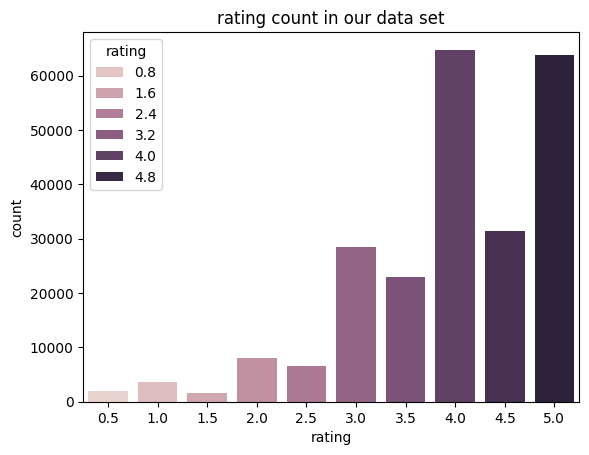

In [72]:
sns_xcount("rating", merged_data)


Rating has 0.5 as the smallest value and 5.0 as the biggest. Rating 4.0 and rating 5.0 both have the highest number of count
#
Below we visually inspect the top 50 movie tags in our data

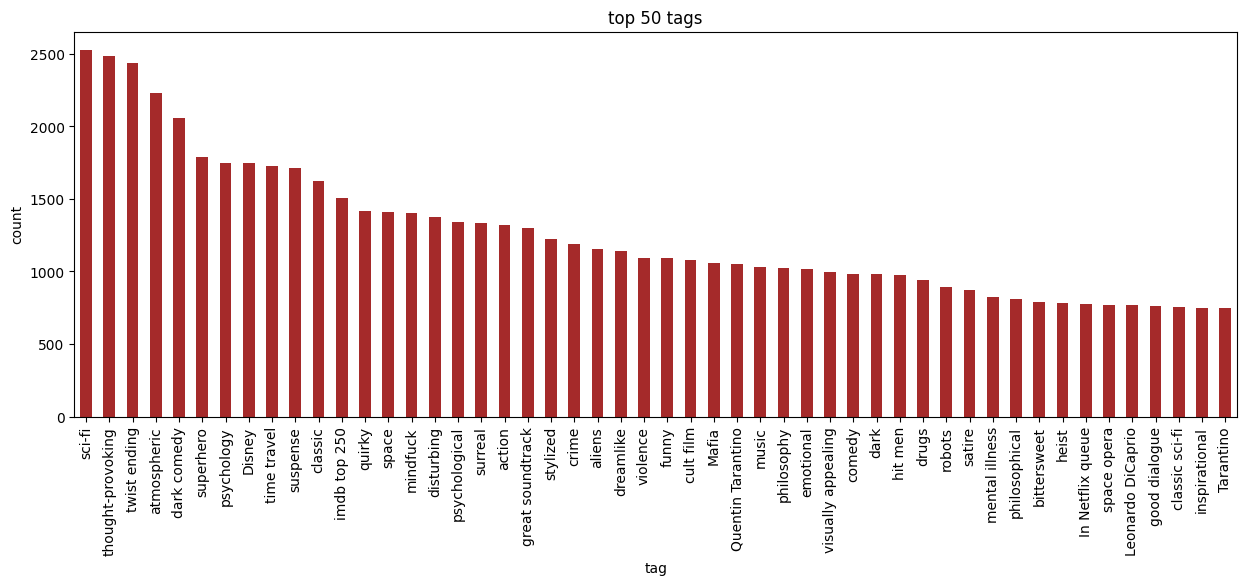

In [73]:
#plotting top 50 tags barplot using matplotlib
fig, ax = plt.subplots(figsize = (15,5))
merged_data ["tag"].value_counts().head(50).plot(kind = "bar", color = "brown")
plt.title("top 50 tags")
plt.xlabel("tag")
plt.ylabel("count")
plt.show();

Next we are also going to visualize the movie genres in our dataset

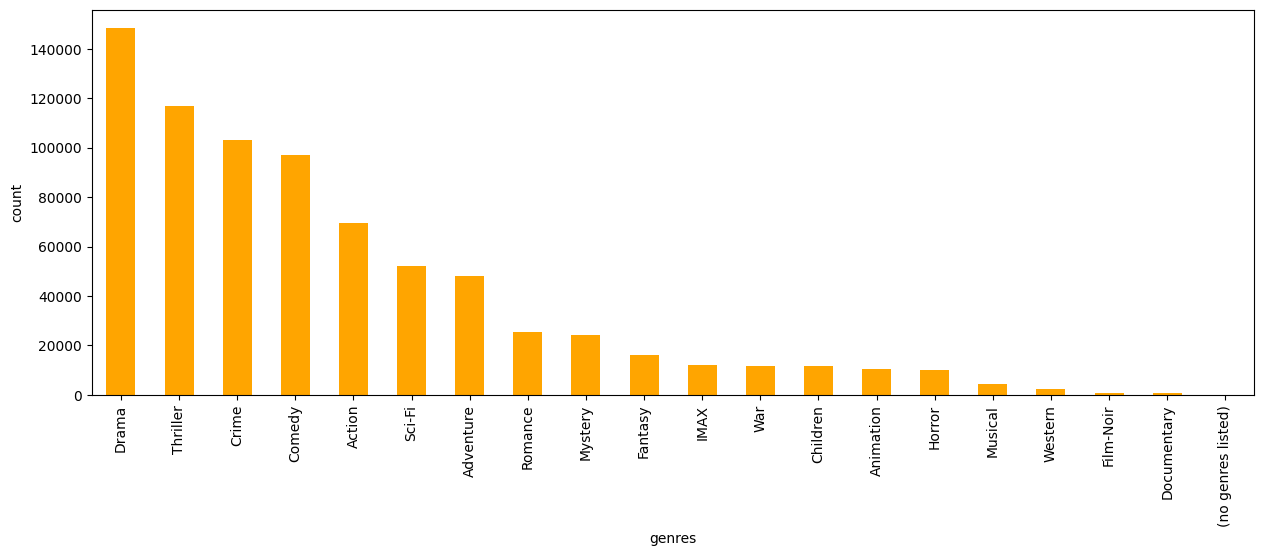

In [74]:
#getting each count of unique genre
genre_to_plot = merged_data["genres"].str.split("|", expand= True).stack().value_counts()
#plotting a barplot using matplotlib
fig, ax = plt.subplots(figsize = (15,5))
genre_to_plot.plot(kind = "bar", color = "orange")
sns.countplot()
plt.xlabel("genres")
plt.ylabel("count")
plt.show();

#### 2.2 Bivariate exploratory analysis
#
Visualizing the trend of ratings yearly over the years

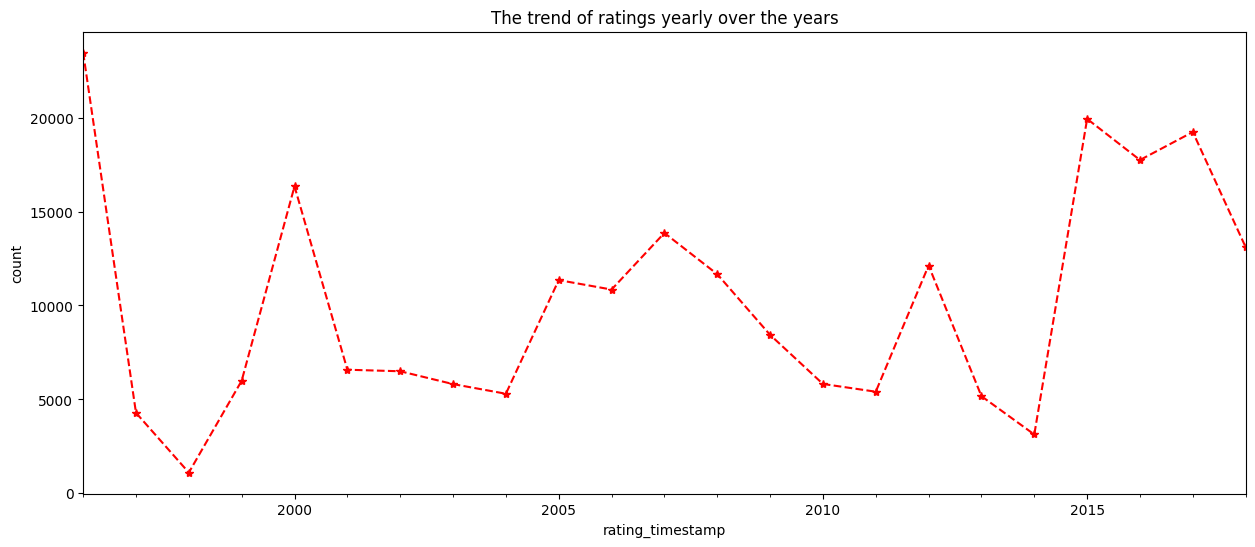

In [75]:
#set rating_timestamp as the index
trends_data = merged_data.set_index("rating_timestamp")
#yearly resampling 
yearly_trend = trends_data.resample("Y").size()
#plotting the trend
plt.figure(figsize= (15, 6))
yearly_trend.plot(marker = "*", linestyle = "--", color = "red")
plt.title("The trend of ratings yearly over the years")
plt.xlabel("rating_timestamp")
plt.ylabel("count")
plt.show();

Visualizing the trend of movie tagging

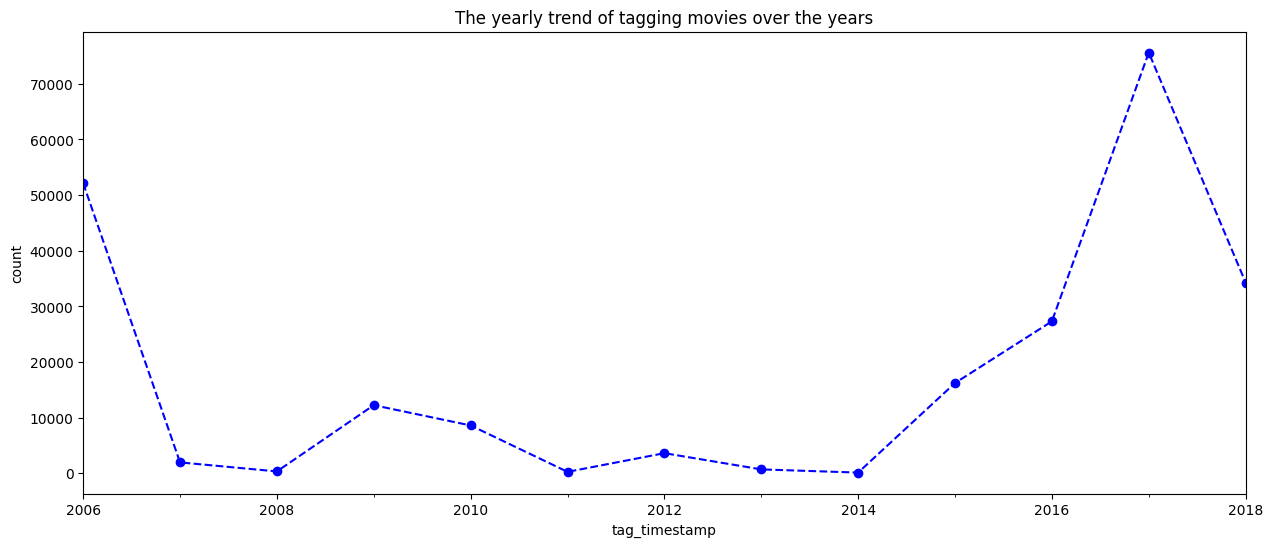

In [76]:
#set tag_timestamp as the index
tag_data = merged_data.set_index("tag_timestamp")
#yearly resampling 
yearly_trend = tag_data.resample("Y").size()
#plotting the trend
plt.figure(figsize= (15, 6))
yearly_trend.plot(marker = "o", linestyle = "--", color = "blue")
plt.title("The yearly trend of tagging movies over the years")
plt.xlabel("tag_timestamp")
plt.ylabel("count")
plt.show();

#### 2.3 Multivariate exploratory analysis


In [77]:
numeric_data = merged_data.select_dtypes("number")
numeric_data.corr()


,movieId,userId_x,rating,userId_y,imdbId,tmdbId
movieId,1.000000,0.015315,-0.070718,-0.223557,0.893323,0.738552
userId_x,0.015315,1.000000,0.047780,-0.015140,0.011689,0.011060
rating,-0.070718,0.047780,1.000000,0.106969,-0.051307,-0.051000
userId_y,-0.223557,-0.015140,0.106969,1.000000,-0.202470,-0.173187
imdbId,0.893323,0.011689,-0.051307,-0.202470,1.000000,0.805425
tmdbId,0.738552,0.011060,-0.051000,-0.173187,0.805425,1.000000
